In [12]:
import stim

circuit = stim.Circuit()

circuit.append("X", [4])
circuit.append("H", [0, 1, 2, 3, 4])
circuit.append("CNOT", [0, 4])
circuit.append("H", [0])
circuit.append("CNOT", [1, 4])
circuit.append("H", [1])
circuit.append("CNOT", [2, 4])
circuit.append("H", [2])
circuit.append("CNOT", [3, 4])
circuit.append("H", [3])
circuit.append("M", [0, 1, 2, 3])
# circuit.append("H", [0])
# circuit.append("CNOT", [0, 1])

# # Then, the circuit will measure both qubits of the Bell pair in the Z basis.
# circuit.append("M", [0, 1])


circuit.diagram()

q0: -H---@-H-----M:rec[0]----------
         |
q1: -H---|-@-H---M:rec[1]----------
         | |
q2: -H---|-|-@-H-M:rec[2]----------
         | | |
q3: -H---|-|-|-@-H--------M:rec[3]-
         | | | |
q4: -X-H-X-X-X-X-------------------

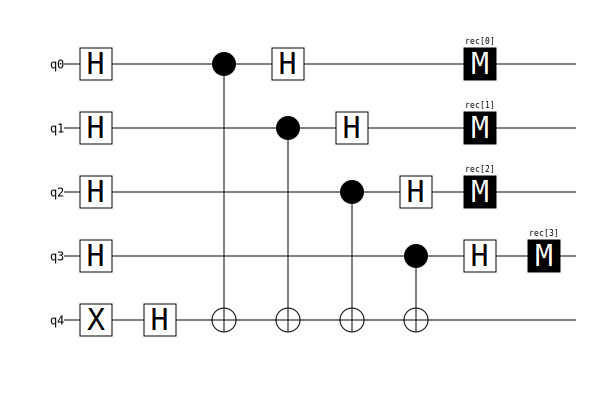

In [13]:
circuit.diagram('timeline-svg')

In [14]:
sampler = circuit.compile_sampler()
print(sampler.sample(shots=10))

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [18]:
print(circuit)

X 4
H 0 1 2 3 4
CX 0 4
H 0
CX 1 4
H 1
CX 2 4
H 2
CX 3 4
H 3
M 0 1 2 3


In [26]:
test_circuit = stim.Circuit("""
    X 4
    H 0 1 2 3
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK
                        
    H 4
    CX 0 4
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK

    H 0
    CX 1 4
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK

    H 1
    CX 2 4
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK

    H 2
    CX 3 4
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK
    H 3
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK
    M 0 1 2 3
    DETECTOR rec[-1] rec[-2]
""")

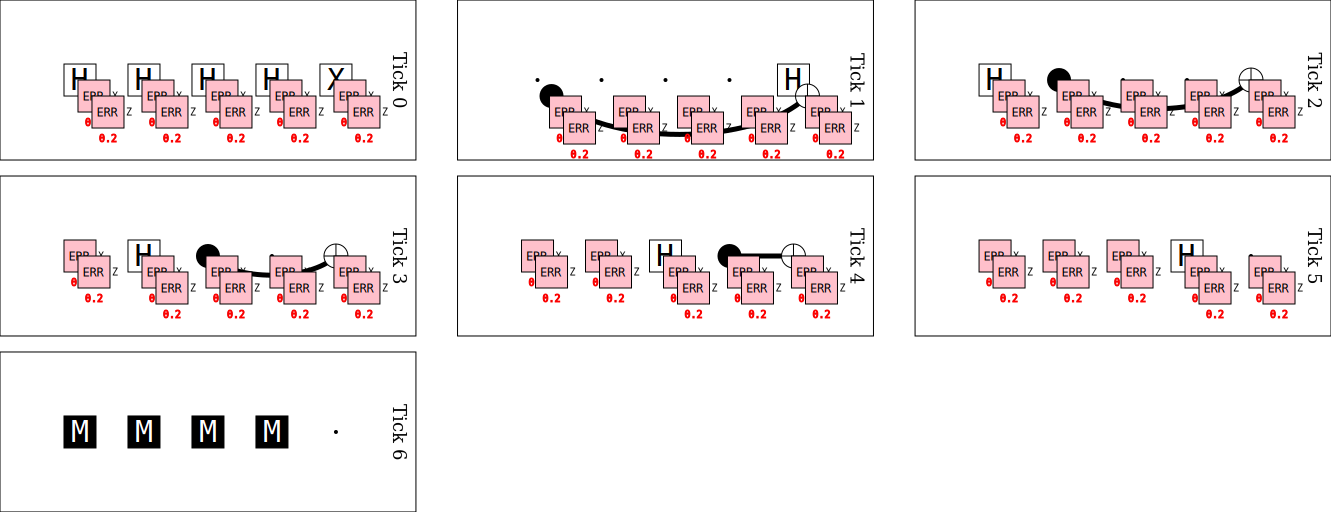

In [27]:
test_circuit.diagram('timeslice-svg')

In [30]:
sampler = test_circuit.compile_detector_sampler()
print(sampler.sample(shots=10))

[[ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]]


In [31]:
import numpy as np
print(np.sum(sampler.sample(shots=10**6)) / 10**6)

0.499592


In [50]:
def generate_bv_circuit(num_qubits):
    circuit = stim.Circuit()
    qubits = [i for i in range(num_qubits)]
    circuit.append("X", [num_qubits-1])
    circuit.append("H", qubits[:num_qubits])
    for i in range(num_qubits-1):
        circuit.append("CNOT", [i, num_qubits-1])
        circuit.append("H", [i])
    circuit.append("M", qubits[:num_qubits-1])
    return circuit


In [51]:
bv5_circuit = generate_bv_circuit(5)
bv5_circuit.diagram()

q0: -H---@-H-----M:rec[0]----------
         |
q1: -H---|-@-H---M:rec[1]----------
         | |
q2: -H---|-|-@-H-M:rec[2]----------
         | | |
q3: -H---|-|-|-@-H--------M:rec[3]-
         | | | |
q4: -X-H-X-X-X-X-------------------

In [66]:
def generate_bv_circuit_with_errors(num_qubits, x_error):
    circuit = stim.Circuit()
    qubits = [i for i in range(num_qubits)]
    circuit.append("X", [num_qubits-1])
    circuit.append("TICK")
    circuit.append("X_ERROR", qubits, arg=x_error)
    circuit.append("H", qubits[:num_qubits])
    circuit.append("TICK")
    circuit.append("X_ERROR", qubits, arg=x_error)
    for i in range(num_qubits-1):
        circuit.append("CNOT", [i, num_qubits-1])
        circuit.append("TICK")
        circuit.append("X_ERROR", qubits, arg=x_error)
        circuit.append("H", [i])
    circuit.append("TICK")
    circuit.append("X_ERROR", qubits, arg=x_error)
    circuit.append("M", qubits[:num_qubits-1])
    return circuit

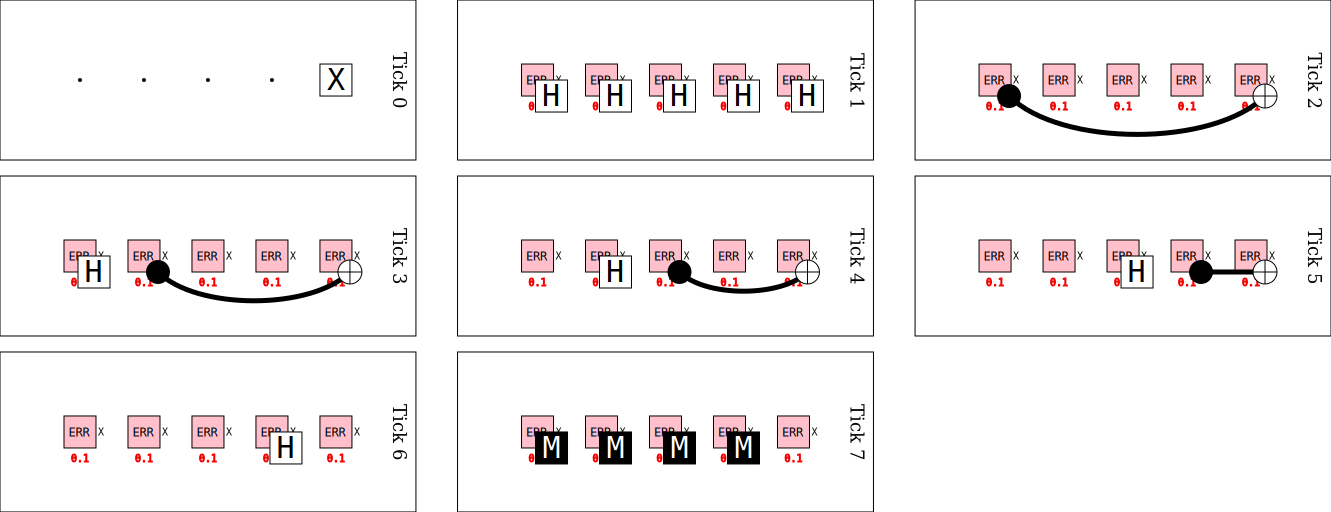

In [68]:
bv5_circuit_with_errors = generate_bv_circuit_with_errors(5, x_error=0.1)
bv5_circuit_with_errors.diagram('timeslice-svg')